Hypothesis Testing is basically an assumption that we make about the population parameter.

Statistical Hypothesis consists of 2 parts:

Null Hypothesis $H_{o}$

Alternative Hypothesis $H_{a}$

The Null hypothesis states 'Null' condition exists, meaning the statement that has been said is happening, nothing new happening, old beliefs are true.

The Alternative hypothesis states, the new theory is true, or something new is happening, old beliefs are not true.

Eg: Officials wanted to know if average height of population changed or not.

$H_{o}$ : Average height of population is 160.

$H_{a}$ : Average height of population is not equal to 160.

A variable is said to be normally distributed if its distribution has the shape of a normal curve and its mean, median, and mode are equal.

A standard normal distribution is a normal distribution with mean 0 and standard deviation 1.


Level of significance: Means degree of significance in which we accept or reject the null-hypothesis.
This is normally denoted with alpha and generally it is 0.05 or 5% , which means output should be 95% confident to give similar kind of result in each sample.

## Type I vs Type II

Type I error: When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by ${\alpha}$.
    
Type II errors: When we accept the null hypothesis but it is false. Type II errors are denoted by ${\beta}$.

Alpha can only be committed when the null hypothesis is rejected and beta can only be committed when the null hypothesis is not rejected.

## One Tail vs Two Tail

One tailed test : Region of rejection is on only one side of the sampling distribution

Two-tailed test : Critical area of a distribution is two-sided and tests whether a sample is greater than or less than a certain range of values.

## P-value

P-value : Probability of finding the observed results when the null hypothesis of a study question is true.

If your P value is less than the chosen significance level then you reject the null hypothesis.

Lets say $\alpha = .05$

- If $p\underline{<} 0.05$ strong evidence against the $H_{o}$, hence reject the Null Hypothesis.
- If $p>0.05$ weak evidence against the $H_{o}$, hence fail to reject the Null Hypothesis.

## Z-Test

z  tests are a statistical way of testing a hypothesis when either:

- We know the population variance, or
- We do not know the population variance but our sample size is large n ≥ 30

### One Sample Z-Test

<div>
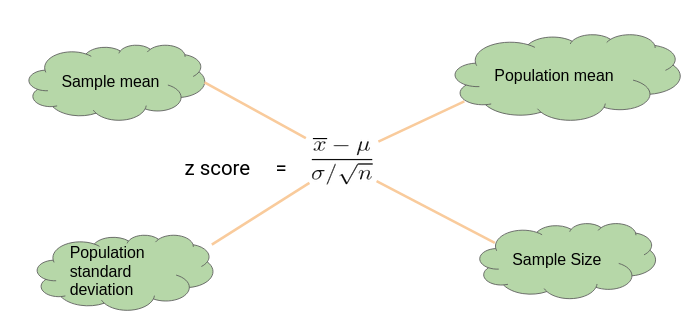
</div>

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df['Height'].mean()

66.36755975482124

Step 1: Create the hypothesis (Null and Alternate Hypothesis)

Step 2: Appropriate statistical test

Step 3: Lets set $\alpha$ (Type l error) as 0.05

Step 4: Get data

Step 5: Analyze

Suppose, we want to confirm average height is 70 or not.

$$H_{o}: \space \space  \mu = 70$$

$$H_{a}: \space \space  \mu \ne 70$$

Value of $z$ at $\alpha$ = 0.05 making it 0.025 for 2 sided we know from z table : $\underline{+}$1.96

In [4]:
# getting a sample of size 100 from population 

sampleData = df['Height'][np.argsort(np.random.random(1000))[:100]]
sampleData.head()

471    68.766162
513    70.794303
155    69.308403
347    69.390474
388    68.890839
Name: Height, dtype: float64

In [5]:
sampleDataMean = sampleData.mean()
hypotheticalMean = 70
N = len(sampleData) # sample size
stdDevPopu = np.std(df['Height'])

In [6]:
z_observed = (sampleDataMean-hypotheticalMean)/(stdDevPopu/math.sqrt(N))
round(z_observed,4)

-1.4139

In [7]:
z_critical = -1.96 # at alpha = 5% for two tail test

if z_observed < z_critical: # for negative z only
    print("Reject Null Hypothesis!")
else:
    print("Fail to reject Null Hypothesis!")

Fail to reject Null Hypothesis!


So, we didn't make Type I error as the value is not 70.

In [8]:
# another way to check hypothesis validity is by checking p-value

import scipy.stats

pval = scipy.stats.norm.sf(abs(z_observed))
round(pval,4) # gives same value as -Z table value

0.0787

In [9]:
if pval < 0.05: # at alpha = 5%
    print("Reject Null Hypothesis!")
else:
    print("Fail to reject Null Hypothesis!")

Fail to reject Null Hypothesis!


Manually, if z-value is positive, check P-Value from positive Z table. And do 1-pVal for P-Value.

If z-value is negative, take P-Value directly from negative Z table.

But in Python, scipy automatically takes. No need to subtract anything.

P-value is always acceptance area from graph. Margin of acceptance/rejection area is drawn by Z-critical value.

### Two sample Z-Test

<div>
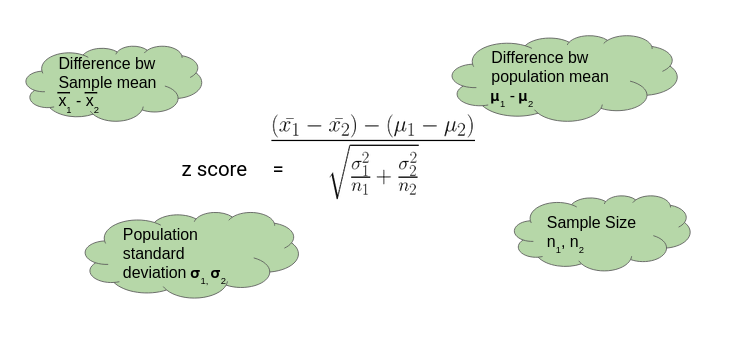
</div>

H0 : Mean of both populations equal.

H1 : Mean not equal.

In [10]:
from statsmodels.stats import weightstats as stests

A_score = [23,21,31,20,19,35,26,22,21,19]
B_score = [46,42,62,40,38,70,52,44,42,38]

ztest, pval = stests.ztest(A_score, B_score)
print(float(pval))

5.269853207542008e-10


In [11]:
if pval < 0.05: # at alpha = 5%
    print("Reject Null Hypothesis!")
else:
    print("Fail to reject Null Hypothesis!")

Reject Null Hypothesis!


# T Test

- We do not know the population variance
- Our sample size is small, n < 30

### One Sample T-Test

<div>
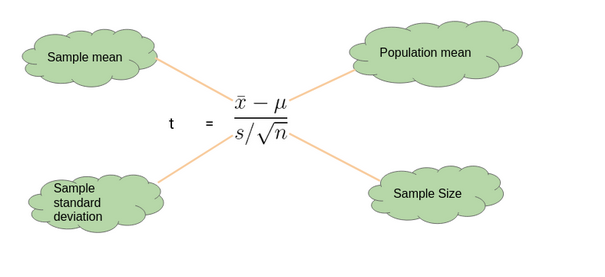
</div>

In [12]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
len(ages)

32

In [13]:
import numpy as np

ages_mean = np.mean(ages)
print(ages_mean) # population mean

30.34375


In [14]:
# Lets take sample of size 10

sample_size = 10
age_sample = np.random.choice(ages,sample_size)
age_sample

array([26, 55, 18, 17, 35, 55, 43, 65, 43, 30])

Suppose, population mean is 30 and we want to confirm average age is 30 or not.

$$H_{o}: \space \space  \mu = 30$$

$$H_{a}: \space \space  \mu \ne 30$$

In [15]:
# trying to find if sample mean and population mean is having difference or not

from scipy.stats import ttest_1samp # library for 1 sample t-test

t_val, pval = ttest_1samp(age_sample,30) # 30 is pop mean
print(round(t_val,3), round(pval,3))

1.681 0.127


In [16]:
if pval<0.05: # at alpha = 5%
    print("Reject Null Hypothesis!")
else:
    print("Fail to reject Null Hypothesis!")

Fail to reject Null Hypothesis!


Fails to reject means there is no difference in population and sample mean.

### Two Sample T-Test

2-sample T-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

<div>
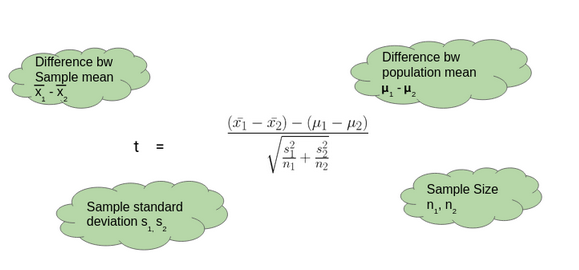
</div>

In [17]:
A_score = [23,21,31,20,19,35,26,22,21,19]
B_score = [46,42,62,40,38,70,52,44,42,38]

In [18]:
import numpy as np

print('A mean score:', np.mean(A_score))
print('B mean score:', np.mean(B_score))

A mean score: 23.7
B mean score: 47.4


In [19]:
#2 Sample T-test

_, pval = scipy.stats.ttest_ind(A_score,B_score)
pval

7.3390410384768156e-06

In [20]:
if pval < 0.05: # at alpha = 5%
    print("Reject Null Hypothesis!")
else:
    print("Fail to reject Null Hypothesis!")

Reject Null Hypothesis!


# Anova (F Test)

Tests whether the means of two or more independent samples are significantly different.

H0: Means of the samples are equal.

H1: One or more of the means of the samples are unequal.

In [21]:
from scipy.stats import f_oneway

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]

stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.096, p=0.908


In [22]:
if p < 0.05: # at alpha = 5%
    print("Reject Null Hypothesis!")
else:
    print("Fail to reject Null Hypothesis!")

Fail to reject Null Hypothesis!
